# Read in data

In [104]:
reviews<- read.csv("review_sample.csv")

In [105]:
library(dplyr)
library(ggplot2)
library(tm)
library(RColorBrewer)

In [106]:
head(reviews)

marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
US,18778586,RDIJS7QYB6XNR,B00EDBY7X8,122952789,Monopoly Junior Board Game,Toys,5,0,0,N,Y,Five Stars,Excellent!!!,31/08/2015
US,24769659,R36ED1U38IELG8,B00D7JFOPC,952062646,56 Pieces of Wooden Train Track Compatible with All Major Train Brands,Toys,5,0,0,N,Y,Good quality track at excellent price,"Great quality wooden track (better than some others we have tried). Perfect match to the various vintages of Thomas track that we already have. There is enough track here to have fun and get creative incorporating your key pieces with track splits, loops and bends.",31/08/2015
US,44331596,R1UE3RPRGCOLD,B002LHA74O,818126353,Super Jumbo Playing Cards by S&S Worldwide,Toys,2,1,1,N,Y,Two Stars,Cards are not as big as pictured.,31/08/2015
US,23310293,R298788GS6I901,B00ARPLCGY,261944918,Barbie Doll and Fashions Barbie Gift Set,Toys,5,0,0,N,Y,my daughter loved it and i liked the price and it came ...,my daughter loved it and i liked the price and it came to me rather than shopping with a ton of people around me. Amazon is the Best way to shop!,31/08/2015
US,38745832,RNX4EXOBBPN5,B00UZOPOFW,717410439,Emazing Lights eLite Flow Glow Sticks - Spinning Light LED Toy,Toys,1,1,1,N,Y,DONT BUY THESE!,Do not buy these! They break very fast I spun then for 15 minutes and the end flew off don't waste your money. They are made from cheap plastic and have cracks in them. Buy the poi balls they work a lot better if you only have limited funds.,31/08/2015
US,13394189,R3BPETL222LMIM,B009B7F6CA,873028700,Melissa & Doug Water Wow Coloring Book - Vehicles,Toys,5,0,0,N,Y,Five Stars,Great item. Pictures pop thru and add detail as &#34;painted.&#34; Pictures dry and it can be repainted.,31/08/2015


# Exploration analysis for star rating

In [107]:
rating_count <- count(reviews,star_rating)

In [108]:
rating_count

star_rating,n
1,5
2,2
3,5
4,4
5,33


In [109]:
rating_mean <- mean(reviews$star_rating)


In [110]:
rating_mean

[1] 4.183673

In [111]:
total_votes <- count(reviews,total_votes)
total_votes

total_votes,n
0,29
1,14
2,3
4,2
6,1


In [112]:
helpful_rating <- count(reviews,helpful_votes)
helpful_rating

helpful_votes,n
0,37
1,9
2,2
4,1


# Distribution of star rating

In [113]:
numreviews  <-  group_by(reviews, star_rating) %>% summarise(pct = n()/nrow(reviews))

In [114]:
numreviews

star_rating,pct
1,0.10204082
2,0.04081633
3,0.10204082
4,0.08163265
5,0.67346939


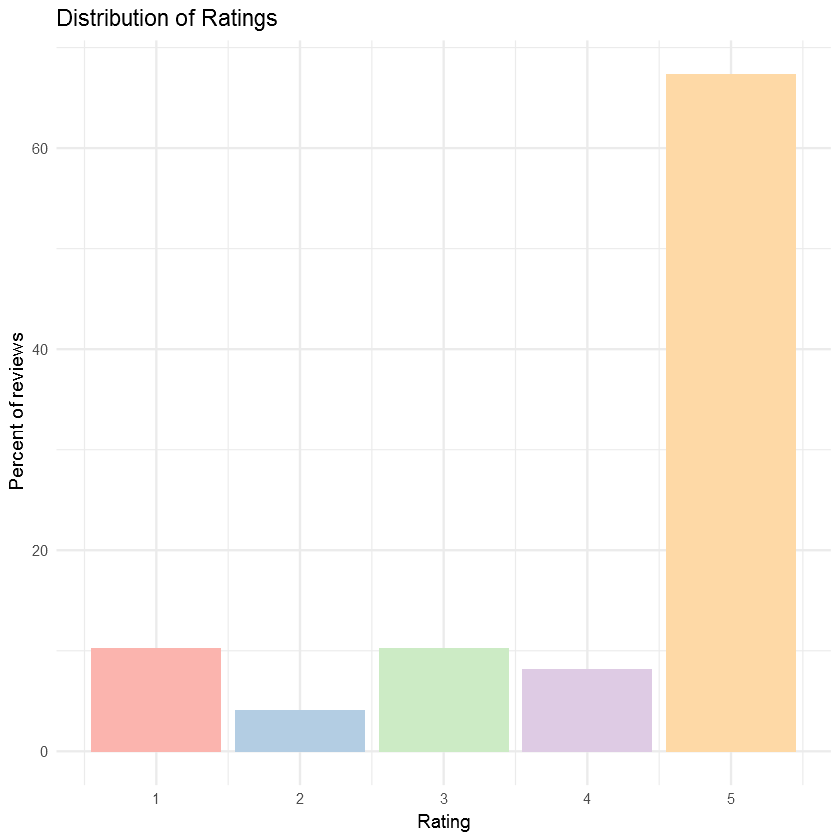

In [115]:
rating_dis = ggplot(numreviews, aes(x = star_rating, y = pct*100))
rating_dis + geom_bar(aes(fill = factor(star_rating)), stat = "identity") + 
  theme_minimal() + xlab("Rating") + ylab("Percent of reviews") +
  ggtitle("Distribution of Ratings") + guides(fill = F) + 
  scale_fill_brewer(palette = "Pastel1")

# Review text 

In [116]:
review_length  <- mutate(reviews,num_character= nchar(reviews$review_body))
review_length$num_word  <- sapply(strsplit(reviews$review_body,' '),length)

In [117]:
review_length <- select(review_length,num_character,num_word,review_body)
review_length


num_character,num_word,review_body
12,1,Excellent!!!
265,45,"Great quality wooden track (better than some others we have tried). Perfect match to the various vintages of Thomas track that we already have. There is enough track here to have fun and get creative incorporating your key pieces with track splits, loops and bends."
33,7,Cards are not as big as pictured.
145,31,my daughter loved it and i liked the price and it came to me rather than shopping with a ton of people around me. Amazon is the Best way to shop!
241,49,Do not buy these! They break very fast I spun then for 15 minutes and the end flew off don't waste your money. They are made from cheap plastic and have cracks in them. Buy the poi balls they work a lot better if you only have limited funds.
105,18,Great item. Pictures pop thru and add detail as &#34;painted.&#34; Pictures dry and it can be repainted.
41,9,"To keep together, had to use crazy glue."
31,6,I was pleased with the product.
16,3,Children like it
71,15,Showed up not how it's shown . Was someone's old toy. with paint on it.


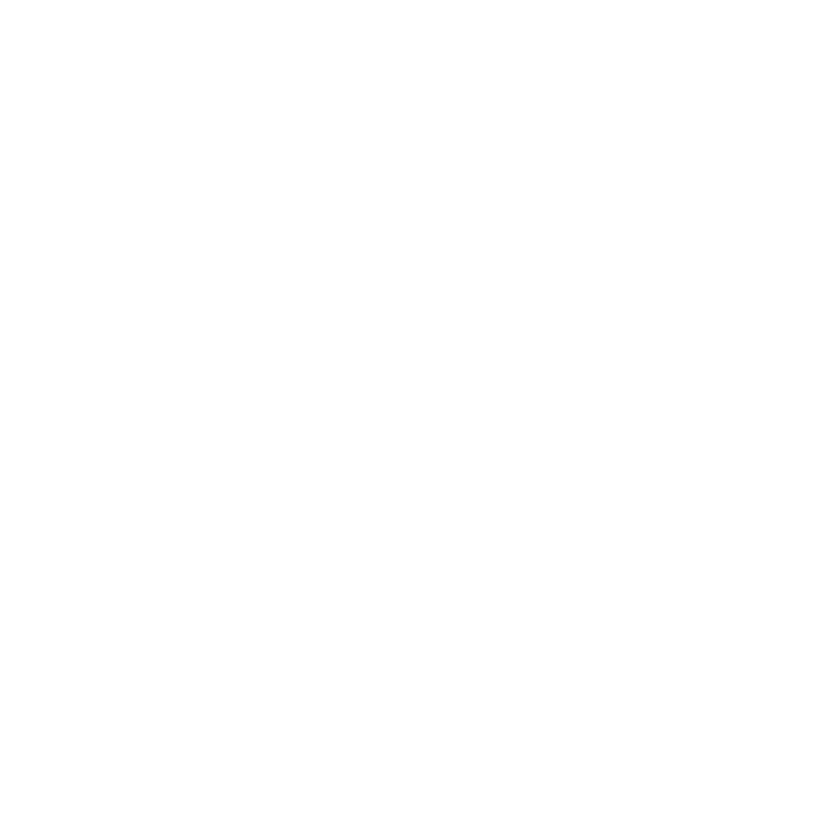

In [135]:
ggplot(review_length, aes(x = factor(star_rating), y = num_word)) + 
  geom_boxplot(outlier.shape = NA, aes(fill = factor(star_rating))) + 
  scale_y_continuous(limits = c(0,225)) + theme_minimal() + 
    xlab("Rating") + ylab("Number of words in review") +
    ggtitle("Word Count by Rating") + 
    scale_fill_brewer(palette = "Pastel1") +
  guides(fill = F)

In [119]:
reviews <- reviews %>% group_by(customer_id,product_id)%>%
filter(row_number(product_id)==1)%>% ungroup()